In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [46]:
now = datetime.now()
start=datetime(now.year-10,now.month,now.day)
end=now
ticker='AAPL'
df=yf.download(ticker,start,end)

df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-13,27.601074,28.005299,27.375514,27.781971,207309200
2015-03-16,27.904795,27.904795,27.440274,27.665834,143497200
2015-03-17,28.371546,28.434077,28.061120,28.116952,204092400
2015-03-18,28.690905,28.845001,28.221917,28.362613,261083600
2015-03-19,28.474283,28.865107,28.451951,28.753443,183238000
...,...,...,...,...,...
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400
2025-03-07,239.070007,241.369995,234.759995,235.110001,46273600


In [47]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [48]:
# Flatten the MultiIndex and remove the ticker (second level)
df.columns = df.columns.get_level_values(0)  # Get only the first level (Price type)

In [49]:
# Remove the column name (Price)
df.columns.name = None

In [50]:
df.shape

(2515, 5)

In [51]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [52]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2015-03-13,27.601074,28.005299,27.375514,27.781971,207309200
2015-03-16,27.904795,27.904795,27.440274,27.665834,143497200
2015-03-17,28.371546,28.434077,28.061120,28.116952,204092400
2015-03-18,28.690905,28.845001,28.221917,28.362613,261083600
2015-03-19,28.474283,28.865107,28.451951,28.753443,183238000
...,...,...,...,...,...
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400
2025-03-07,239.070007,241.369995,234.759995,235.110001,46273600
2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200


# 2. Data Exploration & Visualization

In [53]:
df.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [54]:
df.describe()

,Close,High,Low,Open,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,98.109218,99.071753,97.041325,98.022452,1.134192e+08
std,67.714373,68.351657,66.986375,67.645034,6.565787e+07
min,20.674536,20.978906,20.475435,20.596722,2.323470e+07
25%,36.507242,36.836963,36.173338,36.516632,6.945985e+07
50%,72.009125,72.776606,70.190057,71.716485,9.765440e+07
75%,155.229645,157.820537,152.821050,155.879709,1.377878e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [55]:
df.dtypes

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [56]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-03-13,27.601074,28.005299,27.375514,27.781971,207309200
2015-03-16,27.904795,27.904795,27.440274,27.665834,143497200
2015-03-17,28.371546,28.434077,28.061120,28.116952,204092400
2015-03-18,28.690905,28.845001,28.221917,28.362613,261083600
2015-03-19,28.474283,28.865107,28.451951,28.753443,183238000


In [57]:
df=df.reset_index()
df

,Date,Close,High,Low,Open,Volume
0,2015-03-13,27.601074,28.005299,27.375514,27.781971,207309200
1,2015-03-16,27.904795,27.904795,27.440274,27.665834,143497200
2,2015-03-17,28.371546,28.434077,28.061120,28.116952,204092400
3,2015-03-18,28.690905,28.845001,28.221917,28.362613,261083600
4,2015-03-19,28.474283,28.865107,28.451951,28.753443,183238000
...,...,...,...,...,...,...
2510,2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400
2511,2025-03-07,239.070007,241.369995,234.759995,235.110001,46273600
2512,2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200
2513,2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400


Text(0, 0.5, 'Close price')

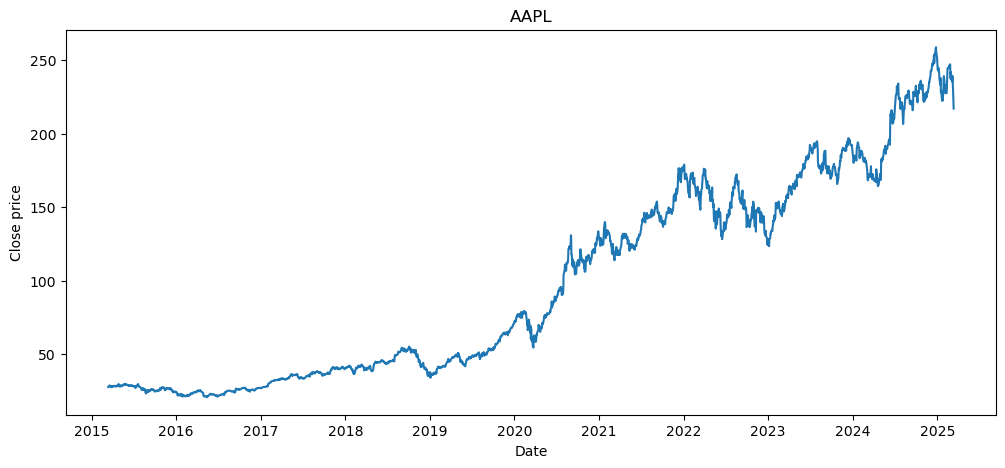

In [58]:
plt.figure(figsize=(12,5))
plt.plot(df.Date,df.Close)
plt.title(ticker)
plt.xlabel('Date')
plt.ylabel('Close price')

# 3. Feature Engineering

In [59]:
temp_df=[10,20,30,40,50,60,70,80,90,100]
df1=pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [60]:
df1['MA_5']=df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days Moving Average

In [61]:
df['MA_100']=df.Close.rolling(100).mean()
df.head(103)

,Date,Close,High,Low,Open,Volume,MA_100
0,2015-03-13,27.601074,28.005299,27.375514,27.781971,207309200,NaN
1,2015-03-16,27.904795,27.904795,27.440274,27.665834,143497200,NaN
2,2015-03-17,28.371546,28.434077,28.061120,28.116952,204092400,NaN
3,2015-03-18,28.690905,28.845001,28.221917,28.362613,261083600,NaN
4,2015-03-19,28.474283,28.865107,28.451951,28.753443,183238000,NaN
...,...,...,...,...,...,...,...
98,2015-08-03,26.561422,27.487618,26.355101,27.247659,279904000,NaN
99,2015-08-04,25.709225,26.395461,25.397503,26.332669,496554400,28.399352
100,2015-08-05,25.879665,26.337157,25.139605,25.330226,397250400,28.382137
101,2015-08-06,25.935986,26.244614,25.708458,26.125218,211612000,28.362449


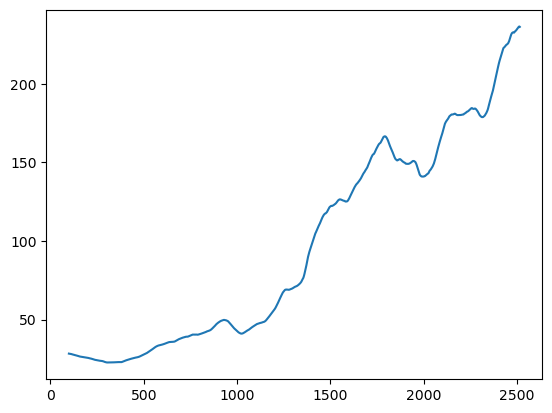

In [62]:
plt.plot(df['MA_100'])

Text(0, 0.5, 'Price')

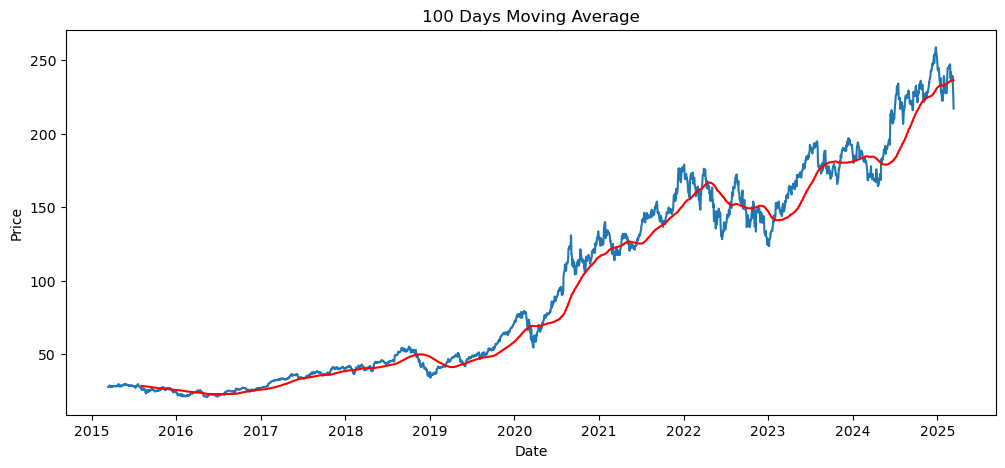

In [63]:
plt.figure(figsize=(12,5))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,df['MA_100'],'r')
plt.title('100 Days Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

### 200 days Moving Average

In [64]:
df['MA_200']=df.Close.rolling(200).mean()


Text(0, 0.5, 'Price')

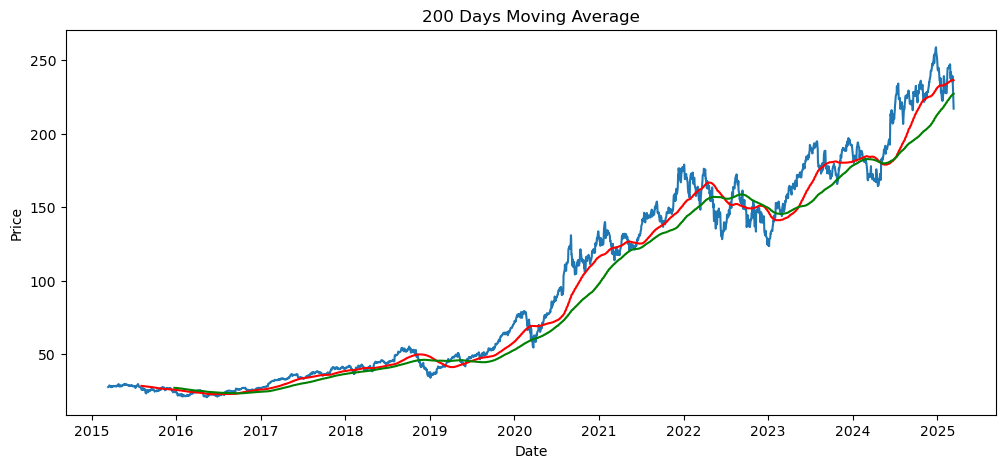

In [65]:
plt.figure(figsize=(12,5))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,df['MA_100'],'r')
plt.plot(df.Date,df['MA_200'],'g')
plt.title('200 Days Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

In [66]:
df

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2015-03-13,27.601074,28.005299,27.375514,27.781971,207309200,NaN,NaN
1,2015-03-16,27.904795,27.904795,27.440274,27.665834,143497200,NaN,NaN
2,2015-03-17,28.371546,28.434077,28.061120,28.116952,204092400,NaN,NaN
3,2015-03-18,28.690905,28.845001,28.221917,28.362613,261083600,NaN,NaN
4,2015-03-19,28.474283,28.865107,28.451951,28.753443,183238000,NaN,NaN
...,...,...,...,...,...,...,...,...
2510,2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400,236.428026,226.398395
2511,2025-03-07,239.070007,241.369995,234.759995,235.110001,46273600,236.533356,226.647575
2512,2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200,236.537653,226.832975
2513,2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400,236.438133,226.978646


In [67]:
df['Percentage Changed']=df.Close.pct_change()
df[['Close','Percentage Changed']]

,Close,Percentage Changed
0,27.601074,NaN
1,27.904795,0.011004
2,28.371546,0.016727
3,28.690905,0.011256
4,28.474283,-0.007550
...,...,...
2510,235.330002,-0.001739
2511,239.070007,0.015893
2512,227.479996,-0.048480
2513,220.839996,-0.029189


# 4.Data Preprocessing

In [68]:
df.shape

(2515, 9)

In [69]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA_100', 'MA_200',
       'Percentage Changed'],
      dtype='object')

In [70]:
# Splitting data into Training & Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])
print(data_training)
print(data_testing)

           Close
0      27.601074
1      27.904795
2      28.371546
3      28.690905
4      28.474283
...          ...
1755  163.904175
1756  163.579422
1757  160.568222
1758  156.759933
1759  154.929565

[1760 rows x 1 columns]
           Close
1760  160.351730
1761  155.992371
1762  152.262817
1763  148.218323
1764  152.617065
...          ...
2510  235.330002
2511  239.070007
2512  227.479996
2513  220.839996
2514  216.979996

[755 rows x 1 columns]


In [71]:
# Scalling down the data between 0 and 1

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [73]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.04378194],
       [0.04570173],
       [0.04865201],
       ...,
       [0.88425367],
       [0.86018187],
       [0.8486123 ]])

In [74]:
type(data_training_array)

numpy.ndarray

In [75]:
data_training_array.shape

(1760, 1)

# 5. Sequence Creation

In [76]:
# 12,15,10,14,16,18,19,20,21,20   22

In [77]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [78]:
x_train

array([[[0.04378194],
        [0.04570173],
        [0.04865201],
        ...,
        [0.04126452],
        [0.03721041],
        [0.03182375]],

       [[0.04570173],
        [0.04865201],
        [0.05067065],
        ...,
        [0.03721041],
        [0.03182375],
        [0.03290109]],

       [[0.04865201],
        [0.05067065],
        [0.04930141],
        ...,
        [0.03182375],
        [0.03290109],
        [0.03325709]],

       ...,

       [[0.75518915],
        [0.74712494],
        [0.74340296],
        ...,
        [0.88444021],
        [0.90533989],
        [0.90328716]],

       [[0.74712494],
        [0.74340296],
        [0.76108211],
        ...,
        [0.90533989],
        [0.90328716],
        [0.88425367]],

       [[0.74340296],
        [0.76108211],
        [0.76778147],
        ...,
        [0.90328716],
        [0.88425367],
        [0.86018187]]])

In [79]:
x_train.shape

(1660, 100, 1)

In [80]:
y_train

array([0.03290109, 0.03325709, 0.0338124 , ..., 0.88425367, 0.86018187,
       0.8486123 ])

In [81]:
!pip install tensorflow

  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/376.0 MB 14.1 MB/s eta 0:00:27
    --------------------------------------- 8.4/376.0 MB 24.8 MB/s eta 0:00:15
   - -------------------------------------- 16.0/376.0 MB 29.6 MB/s eta 0:00:13
   -- ------------------------------------- 24.1/376.0 MB 32.5 MB/s eta 0:00:11
   --- ------------------------------------ 30.9/376.0 MB 33.3 MB/s eta 0:00:11
   ---- ----------------------------------- 39.8/376.0 MB 34.2 MB/s eta 0:00:10
   ----- ---------------------------------- 48.0/376.0 MB 34.7 MB/s eta 0:00:10
   ----- ---------------------------------- 53.5/376.0 MB 34.1 MB/s eta 0:00:10
   ------ --------------------------------- 59.5/376.0 MB 33.0 MB/s eta 0:00:10
   ------- -------------------------------- 67.6/376.0 MB 33.7 MB/s e

In [82]:
!python --version

Python 3.12.9


In [83]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [84]:
print(tf.__file__)

C:\Users\alesa\.conda\envs\stockenv\Lib\site-packages\tensorflow\__init__.py


In [85]:
import sys
print(sys.executable)

C:\Users\alesa\.conda\envs\stockenv\python.exe


In [86]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [88]:
model=Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128,activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7.Model Training

In [89]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.0280 
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.2153e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 3.6718e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.9317e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 4.4060e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.3036e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.7939e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.6989e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.5104e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.5292e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.1826e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.8531e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.6569e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.9448e-04
Epoch 15/50
52/52 

In [90]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm (LSTM)                   │ (None, 100, 128)      │       66,560 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_1 (LSTM)                 │ (None, 64)            │       49,408 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 25)            │        1,625 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 1)             │           26 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [91]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [93]:
data_training

,Close
0,27.601074
1,27.904795
2,28.371546
3,28.690905
4,28.474283
...,...
1755,163.904175
1756,163.579422
1757,160.568222
1758,156.759933


In [92]:
data_testing

,Close
1760,160.351730
1761,155.992371
1762,152.262817
1763,148.218323
1764,152.617065
...,...
2510,235.330002
2511,239.070007
2512,227.479996
2513,220.839996


In [94]:
past_100_days=data_training.tail(100)

In [95]:
past_100_days

,Close
1660,141.081818
1661,142.141693
1662,143.819824
1663,145.988647
1664,146.479340
...,...
1755,163.904175
1756,163.579422
1757,160.568222
1758,156.759933


In [96]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

,Close
0,141.081818
1,142.141693
2,143.819824
3,145.988647
4,146.479340
...,...
850,235.330002
851,239.070007
852,227.479996
853,220.839996


In [97]:
input_data=scaler.fit_transform(final_df)
input_data

array([[1.29473969e-01],
       [1.37316045e-01],
       [1.49732629e-01],
       [1.65779870e-01],
       [1.69410528e-01],
       [1.71007959e-01],
       [1.65271704e-01],
       [1.64908729e-01],
       [1.69846211e-01],
       [1.66433452e-01],
       [1.93445374e-01],
       [1.73331679e-01],
       [1.67232111e-01],
       [1.74929110e-01],
       [1.85603185e-01],
       [1.81754516e-01],
       [1.85681538e-01],
       [1.79572938e-01],
       [1.82263698e-01],
       [1.61248039e-01],
       [1.60884500e-01],
       [1.76300739e-01],
       [1.76373560e-01],
       [1.83645263e-01],
       [2.01752150e-01],
       [2.33602428e-01],
       [2.53090993e-01],
       [2.56508720e-01],
       [2.59344896e-01],
       [2.63198985e-01],
       [2.25894478e-01],
       [2.50836819e-01],
       [2.87632145e-01],
       [2.83778169e-01],
       [2.76433646e-01],
       [2.62471679e-01],
       [2.87777561e-01],
       [3.30390541e-01],
       [3.58750272e-01],
       [3.54969230e-01],


In [98]:
input_data.shape

(855, 1)

In [99]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [101]:
type(y_test)

list

In [113]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [114]:
type(x_test)

numpy.ndarray

# 9. Make Predictions

In [115]:
x_test[0]

array([[0.12947397],
       [0.13731605],
       [0.14973263],
       [0.16577987],
       [0.16941053],
       [0.17100796],
       [0.1652717 ],
       [0.16490873],
       [0.16984621],
       [0.16643345],
       [0.19344537],
       [0.17333168],
       [0.16723211],
       [0.17492911],
       [0.18560319],
       [0.18175452],
       [0.18568154],
       [0.17957294],
       [0.1822637 ],
       [0.16124804],
       [0.1608845 ],
       [0.17630074],
       [0.17637356],
       [0.18364526],
       [0.20175215],
       [0.23360243],
       [0.25309099],
       [0.25650872],
       [0.2593449 ],
       [0.26319898],
       [0.22589448],
       [0.25083682],
       [0.28763214],
       [0.28377817],
       [0.27643365],
       [0.26247168],
       [0.28777756],
       [0.33039054],
       [0.35875027],
       [0.35496923],
       [0.39052875],
       [0.3635499 ],
       [0.35329661],
       [0.38943745],
       [0.33824402],
       [0.33009948],
       [0.31999172],
       [0.343

In [116]:
x_test[0].shape

(100, 1)

# 9. Make Predictions

In [117]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step 


In [118]:
y_predicted=scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [119]:
y_predicted

array([155.78835, 157.87067, 157.10883, 154.27592, 150.39868, 150.99628,
       154.6381 , 157.57402, 160.72105, 162.82855, 165.39076, 167.16197,
       169.90927, 171.4186 , 172.25777, 174.5018 , 174.78752, 172.64075,
       171.34438, 173.66258, 173.01636, 170.48483, 169.52563, 168.12424,
       164.92157, 164.67346, 166.7306 , 164.83675, 163.40431, 164.22432,
       164.7668 , 164.45251, 161.35562, 160.26881, 156.49588, 154.42827,
       157.95131, 157.06508, 156.2448 , 156.71407, 160.90909, 157.95187,
       155.8724 , 151.98532, 151.33641, 147.19345, 142.73141, 143.01256,
       143.31532, 145.59364, 142.73409, 138.57059, 136.24142, 138.08319,
       138.62212, 138.77283, 140.35927, 144.42862, 146.60143, 147.09978,
       148.14294, 145.52979, 143.8574 , 144.51654, 144.97672, 142.48666,
       137.95506, 132.77458, 130.4383 , 131.09393, 129.78438, 129.44151,
       131.45702, 132.92654, 134.9644 , 137.75526, 139.33159, 137.67671,
       136.7998 , 135.18231, 135.20464, 136.88107, 

In [120]:
y_test

array([160.35173035, 155.99237061, 152.26281738, 148.21832275,
       152.61706543, 157.0453186 , 158.05886841, 161.36529541,
       162.74298096, 166.12812805, 167.49598694, 171.29443359,
       171.93405151, 172.80003357, 176.10646057, 174.93544006,
       171.82580566, 171.53059387, 175.59477234, 172.26863098,
       169.09016418, 169.39518738, 167.37788391, 163.10707092,
       164.98661804, 167.68295288, 162.65440369, 162.43795776,
       164.73077393, 164.56347656, 163.76641846, 159.21020508,
       160.28286743, 154.29980469, 154.07345581, 161.03074646,
       155.13626099, 155.4413147 , 156.93702698, 163.37277222,
       154.27026367, 154.9995575 , 149.85523987, 152.26968384,
       144.37583923, 140.49299622, 144.977005  , 143.42976379,
       147.0761261 , 138.77819824, 135.35853577, 135.59503174,
       141.03500366, 138.32485962, 138.48257446, 141.69529724,
       147.47032166, 146.68193054, 146.55380249, 149.01754761,
       143.27207947, 144.02105713, 146.55380249, 145.81

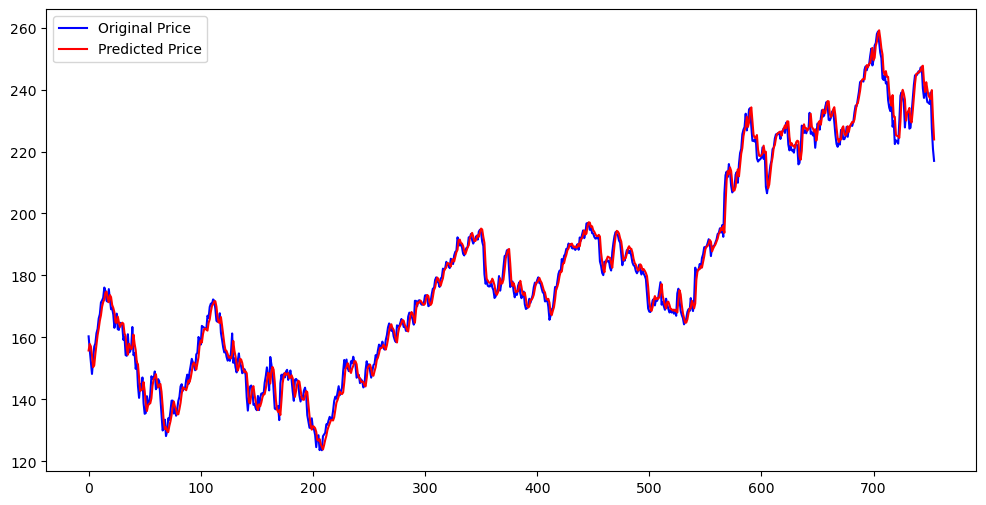

In [127]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel=('Days')
plt.ylabel=('Price')
plt.legend()

(140.0, 220.0)

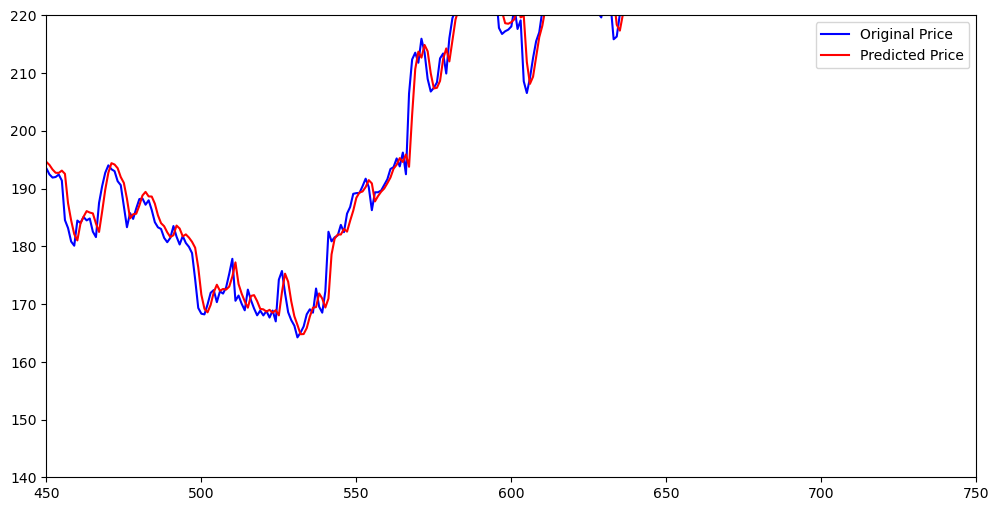

In [126]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel=('Days')
plt.ylabel=('Price')
plt.legend()
plt.xlim(450,750)
plt.ylim(140,220)

# 10. Model Evaluation

In [131]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [132]:
mse=mean_squared_error(y_test,y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 10.435169816506635


In [133]:
# Root Mean Squared Error (RMSE)
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.230351345675364


In [134]:
# R-Squared
r2=r2_score(y_test,y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9901911538291203
